In [1]:
import numpy as np

learning_rate = 1e-3
n_iteration = 1e3

def momentum(x, y, v_x, v_y) :
    
    gamma = 0.9
    
    dx = -np.exp(-x)*(np.cos(x)+np.sin(x))*np.cos(y)
    dy = -np.exp(-x)*np.cos(x)*np.sin(y)
    
    v_x = gamma*v_x + learning_rate*dx
    v_y = gamma*v_y + learning_rate*dy
    
    x = x - v_x 
    y = y - v_y
    
    return x, y, v_x, v_y


def RMSProp(x, y, G_x, G_y) :
    
    gamma = 0.9
    epsilon = 1e-8
    
    dx = -np.exp(-x)*(np.cos(x)+np.sin(x))*np.cos(y)
    dy = -np.exp(-x)*np.cos(x)*np.sin(y)
    
    G_x = gamma*G_x + (1-gamma)*np.power(dx,2)
    G_y = gamma*G_y + (1-gamma)*np.power(dy,2)
    
    x = x - dx * learning_rate / np.sqrt(G_x + epsilon)
    y = y - dy * learning_rate / np.sqrt(G_y + epsilon)
    
    return x, y, G_x, G_y


def Adam(x, y, t, m_x, m_y, v_x, v_y):
    
    b1 = 0.9
    b2 = 0.999
    epsilon = 1e-4
    t = t+1
    
    dx = -np.exp(-x)*(np.cos(x)+np.sin(x))*np.cos(y)
    dy = -np.exp(-x)*np.cos(x)*np.sin(y)
    
    m_x = b1*m_x + (1-b1)*dx
    m_y = b1*m_y + (1-b1)*dy
    
    v_x = b2*v_x + (1-b2)*np.power(dx,2)
    v_y = b2*v_y + (1-b2)*np.power(dy,2)
    
    m_xhat = m_x / (1-np.power(b1,t)) 
    m_yhat = m_y / (1-np.power(b1,t))
    
    v_xhat = v_x / (1-np.power(b2,t)) 
    v_yhat = v_y / (1-np.power(b2,t))

    x = x - m_xhat * learning_rate / np.sqrt(v_xhat + epsilon)
    y = y - m_yhat * learning_rate / np.sqrt(v_yhat + epsilon)
    
    return x, y, t, m_x, m_y, v_x, v_y

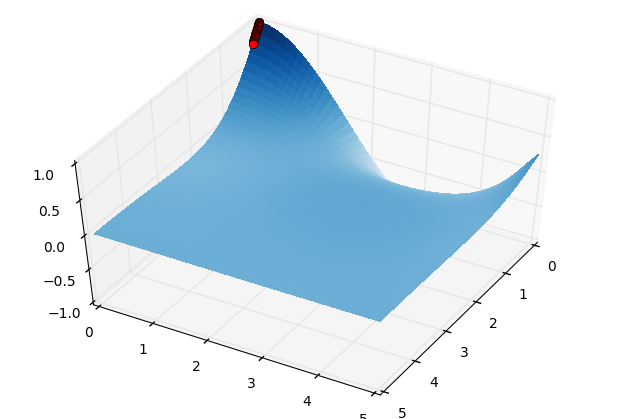

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline
    
fig = plt.figure()
ax = Axes3D(fig)
elev = 50    # elevation of camera
rotate = 30    # rotation of camera
ax.view_init(elev, rotate)

X = np.arange(0,5,0.01)
Y = np.arange(0,5,0.01)
X, Y = np.meshgrid(X,Y)
Z = np.exp(-X)*np.cos(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('Blues'), linewidth=0, antialiased=False)

x_m = 1e-3
y_m = 1e-3
z_m = np.exp(-x_m)*np.cos(x_m)*np.cos(y_m)
x_r = 1e-4
y_r = 1e-4
z_r = np.exp(-x_r)*np.cos(x_r)*np.cos(y_r)
x_a = 1e-4
y_a = 1e-4
z_a = np.exp(-x_a)*np.cos(x_a)*np.cos(y_a)
v_x = 0
v_y = 0
G_x = 0
G_y = 0
m_x = 0
m_y = 0
t = 0

n_iteration = 30
for i in range(0,n_iteration):
    x_m, y_m, v_x, v_y = momentum(x_m, y_m, v_x, v_y)
    z_m = np.exp(-x_m)*np.cos(x_m)*np.cos(y_m)
    ax.plot([x_m], [y_m], [z_m], marker='o', color='r')
"""
for i in range(0,n_iteration):
    x_r, y_r, G_x, G_y = RMSProp(x_r, y_r, G_x, G_y)
    z_r = np.exp(-x_r)*np.cos(x_r)*np.cos(y_r)
    #ax.plot([x_r], [y_r], [z_r], marker='o')

for i in range(0,n_iteration):
    x_a, y_a, t, m_x, m_y, v_x, v_y = Adam(x_a, y_a, t, m_x, m_y, v_x, v_y)
    z_a = np.exp(-x_a)*np.cos(x_a)*np.cos(y_a)
    #ax.plot([x_a], [y_a], [z_a], marker='o')
"""

plt.show()